#### Analiz Template

In [44]:
import pandas as pd
import time

# VERİYİ YÜKLEME
adult_census = pd.read_csv("dataset/adult-census.csv")


In [23]:
# VERI SETINE ILK BAKIS
print(adult_census.head())

   age   workclass      education  education-num       marital-status  \
0   25     Private           11th              7        Never-married   
1   38     Private        HS-grad              9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm             12   Married-civ-spouse   
3   44     Private   Some-college             10   Married-civ-spouse   
4   18           ?   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country   class  
0             0              40   United-States   <=50K  
1             0              5

In [24]:
# ISTATISTIKLER
print(adult_census.describe())

                age  education-num  capital-gain  capital-loss  hours-per-week
count  48842.000000   48842.000000  48842.000000  48842.000000    48842.000000
mean      38.643585      10.078089   1079.067626     87.502314       40.422382
std       13.710510       2.570973   7452.019058    403.004552       12.391444
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000


In [25]:
# KOLONLAR
print(adult_census.columns)

# Kolonların Data tiplerini kontrol etme
print(adult_census.dtypes)

# kaç tane datatype var?
print(adult_census.dtypes.unique())

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')
age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object
[dtype('int64') dtype('O')]


In [26]:
# TARGET SEÇİMİ
target_name = "class"
target = adult_census[target_name]


In [27]:
# KOLONUN MEVCUT AVAILABLE SAMPLELARI VE BUNLARIN SAYISI
print(adult_census[target_name].value_counts())

 <=50K    37155
 >50K     11687
Name: class, dtype: int64


In [28]:
# TARGETI FEATURELARDAN AYIRMA İÇİN DROPLAMA
data = adult_census.drop(columns=[target_name])

In [29]:

# SAMPLE VE KOLONLARIN SAYISI (COLUMNS -1 FEATURE'DIR. ÇÜNKÜ BİR TANESİ TARGETTİR)
print(
    f"The dataset contains {adult_census.shape[0]} samples and "
    f"{adult_census.shape[1]} columns"
)

The dataset contains 48842 samples and 14 columns


In [31]:
# KATEGORİK VE NÜMERİK KOLONLARI SEÇME
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)


In [32]:
# PRE-PROCESSORLERİ TANIMLAMA
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()


In [33]:
# PRE-PROCESSORLERİ COLUMNTRANSFORMER ILE GONDERME
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])



In [41]:
# PIPELINE TANIMLAMA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

# Bir modelin adına ulaşma
model_name = model.__class__.__name__

# pipeline'ı named dict olarak yazdırma
# model.named_steps

# en genel pipeline yazdırma
model

# model ismine erişme
# model_name



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [46]:
# DATAYI TRAIN-TEST OLARAK AYIRMA VE TEST ETME (CV FRAMEWORK DAHA İYİ BİR SEÇİM)
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

# Dataların test-train samplelarının split sonrası yazdırılması
print(f"Number of samples in testing: {data_test.shape[0]} => "
      f"{data_test.shape[0] / data.shape[0] * 100:.1f}% of the"
      f" original set")
print(f"Number of samples in training: {data_train.shape[0]} => "
      f"{data_train.shape[0] / data.shape[0] * 100:.1f}% of the"
      f" original set")


start = time.time()

# Model fit etme
_ = model.fit(data_train, target_train)

elapsed_time = time.time() - start

# Model skoru yazdırma
score = model.score(data_test, target_test)

print(f"The accuracy using a {model_name} is {score:.5f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")

Number of samples in testing: 12211 => 25.0% of the original set
Number of samples in training: 36631 => 75.0% of the original set
The accuracy using a Pipeline is 0.85783 with a fitting time of 0.941 seconds in 276 iterations


In [47]:
# CROSS VALIDATION ILE TEST ETME
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=5)

scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f}")

cv_results

The mean cross-validation accuracy is: 0.851 ± 0.003


{'fit_time': array([1.12318158, 1.15932417, 1.04296088, 1.17728281, 1.21859503]),
 'score_time': array([0.0357883 , 0.0344491 , 0.03826308, 0.04322672, 0.05107236]),
 'test_score': array([0.85116184, 0.8498311 , 0.84756347, 0.85268223, 0.85513923])}

#### Görselleştirme Template

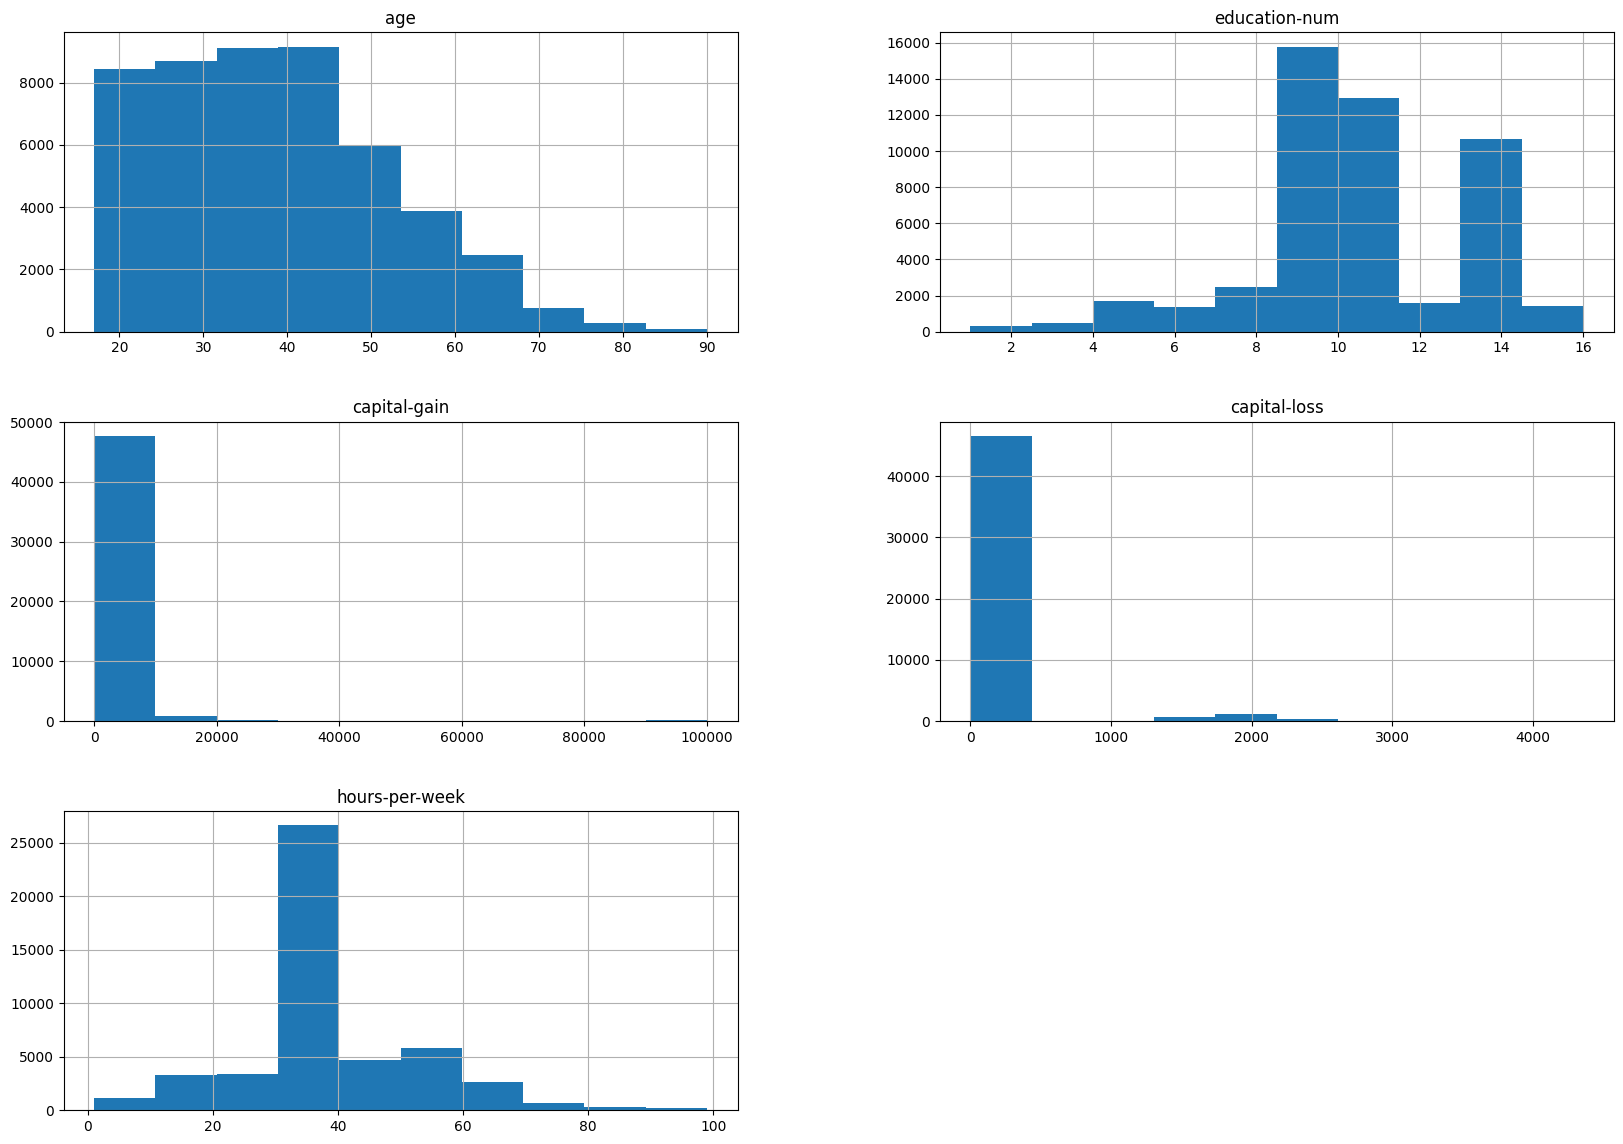

In [48]:
# BASIT OLARAK VERILERIN GORSELLESTIRILMESİ
_ = adult_census.hist(figsize=(20, 14))